# Graph Data Structures and Network Basics

## Graph Basics and NetworkX

### Introduction

- Networks and connections are found everywhere
    - Transportation with roads and rail tracks
    - Airplane networks
    - Social networks
    - Internet
    - Biological networks e.g. food web or molecular networks
- Mathematics calls these **graphs**
- Graphs are collections of two things:
    1. objects or nodes of vertices
    2. edges or connections

### NetworkX

**NetworkX** is Python package to:

- Create networks,
- Manipulate networks, and
- Study networks

In [36]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
# Check requirements

import sys
import matplotlib

print("Python Version: " + '{0[0]}.{0[1]}'.format(sys.version_info))
print("NetworkX Version: " + nx.__version__)
print("Matplotlib Version: " + matplotlib.__version__)

Python Version: 3.6
NetworkX Version: 2.2
Matplotlib Version: 2.2.2


**Note**: There are significant changes in NetworkX from versions 1.x to 2.x
https://networkx.github.io/documentation/latest/release/migration_guide_from_1.x_to_2.0.html

### Network Basics and Motivation

Studying networks is powerful:

- Reveal properties of a population or system that otherwise is hidden
- Understanding patterns that are a result of the kinds of connection
- Understand strength or robustness of a system
    
Nodes and edges can have multiple attributes.

- Think of social network
- Individuals can be described in multiple ways
- Relationships between the individuals can vary

There are different graph types.

- **Undirected** graphs, or simply a graph
- **Directed** graphs, or digraphs

| Type | Alternate Name | Description | NetworkX Call |
|------|----------------|-------------|---------------|
| Undirected graph | Graph | Graphs with edges with no direction | `G = nx.Graph()` |
| Directed graph | Digraph | Graphs with edges with direction | `G = nx.DiGraph()` |

![Undirected graph versus directed graph](https://www.differencebetween.com/wp-content/uploads/2011/05/DifferenceBetween_Directed_UnDirected_Graphs1.jpg)
**Image Source: [https://www.differencebetween.com](https://www.differencebetween.com/wp-content/uploads/2011/05/DifferenceBetween_Directed_UnDirected_Graphs1.jpg)** (May not show up, pulls from internet)

### Basic Interactions with Networks

There are four basic tasks for interacting with networks:

- Add/remove both nodes and edges
- Add/remove node and edge **attributes**
- Plot and visualize the networks
- Analyze properties of network and make inferences

### Objectives

- Ability to describe parts to make a graph
- Describe what are attributes for nodes and edges
- Describe basic metrics to describe graph
- Understanding how to use Matplotlib to visualize and plot results
- Describe basic analysis to be done on networks

## Creating Networks from Scratch and Manipulation

### Working with Nodes and Objects

| Method Command | Description |
|----------------|-------------|
| `nx.nodes(G)` | Return iterator over graph nodes |
| `nx.number_of_nodes(G)` | Return number of nodes in graph |
| `nx.all_neighbors(G, node)` | Return all neighbors of node in graph |
| `nx.non-neighbors(G, node)` | Return non-neighbors of node in graph |
| `nx.common_neighbors(G, u, v)` | Return common neighbors of two nodes in graph |
| `G.add_node(node)` | Add node to graph object, `G` |
| `.G.add_nodes_from(array)` | Add array of nodes to graph object, `G`

In [38]:
# Create directed graph object
DG = nx.DiGraph()

In [39]:
# Add single node
DG.add_node("Michael")

# Or multiple nodes
DG.add_nodes_from(["Andy", "Angela", "Jim"])

In [40]:
# Look at nodes in our object
DG.nodes()

NodeView(('Michael', 'Andy', 'Angela', 'Jim'))

### Working with Edges and Connections

| Method Command | Description |
|----------------|-------------|
| `nx.edges(G)` | Return edge view of edges |
| `nx.number_of_edges(G)` | Return number of edges in graph |
| `nx.non_edges(G)` | Return non-existent edges in graph |
| `G.add_edge(node1, node2)` | Add edge between `node1` and `node2` |

In [41]:
# Add edges and connections between nodes
DG.add_edge("Michael", "Jim")

# Or add a group of edge connections all at once
DG.add_edges_from([("Michael", "Angela"), ("Michael", "Andy"), ("Angela", "Andy")])

In [42]:
# Take a look at edges in object
DG.edges()

OutEdgeView([('Michael', 'Jim'), ('Michael', 'Angela'), ('Michael', 'Andy'), ('Angela', 'Andy')])

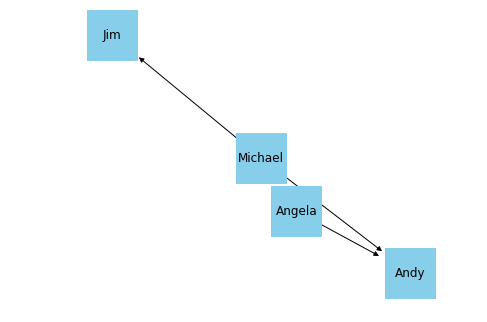

In [43]:
# Visualize network, will get into more details later in lecture
nx.draw(DG, with_labels=True, node_shape="s", node_color="skyblue", node_size=2500)

### Node and Edge Attributes

Nodes and edges can not only just exist, but can also take on values or **attributes**.

| Type | Method Command | Description |
|------|----------------|-------------|
| Node | `nx.set_node_attributes(G, values)` | Set node attributes from given value or dictionary |
| Node | `nx.get_node_attributes(G, name)` | Get node attributes from graph |
| Edge | `nx.set_edge_attributes(G, values)` | Set edge attributes from given value or dictionary |
| Edge | `nx.get_edge_attributes(G, name)` | Get edge attributes from graph |

#### Nodes

In [44]:
# Add attributes for the nodes themselves
DG.node["Michael"]["job"] = "Director"

# Another way to add attributes with the node
DG.add_node("Kelly", job="Rep")

# Or using dictionary with key being node with attribute-key pairs
nx.set_node_attributes(DG, {"Jim": {"job": "Assistant"}, "Andy": {"job": "Associate"}})

In [45]:
# Look up attributes with names of nodes
DG.node["Jim"]

{'job': 'Assistant'}

In [46]:
# Access all node attributes by name
nx.get_node_attributes(DG, "job")

{'Andy': 'Associate',
 'Jim': 'Assistant',
 'Kelly': 'Rep',
 'Michael': 'Director'}

#### Edges

In [47]:
# Add attributes for the nodes themselves
# Note: older version may allow
#   >>> DG.edges["Michael"]["Jim"]["friend"] = True
DG.edges["Michael", "Jim"]["friend"] = True

# Another way to add attributes with the node
DG.add_edge("Andy", "Jim", friend=False)

# Add multiple attributes with dictionary
# Note: older version may use set_edge_attributes
#   >>> nx.set_edge_attributes(DG, "friend", {("Jim", "Andy"): True, ("Kelly", "Andy"): True})
nx.set_edge_attributes(DG,{("Jim", "Andy"): {"friend": True}, ("Kelly", "Andy"): {"friend": True}})

In [48]:
# Look up attributes with names of nodes
DG["Michael"]

AtlasView({'Jim': {'friend': True}, 'Angela': {}, 'Andy': {}})

In [49]:
# Another way to get all edges by name
nx.get_edge_attributes(DG, "friend")

{('Andy', 'Jim'): False, ('Michael', 'Jim'): True}

In [50]:
# Taking a look at all edges and attributes
DG.edges(data=True)

OutEdgeDataView([('Michael', 'Jim', {'friend': True}), ('Michael', 'Angela', {}), ('Michael', 'Andy', {}), ('Andy', 'Jim', {'friend': False}), ('Angela', 'Andy', {})])

## Analyzing Existing Networks

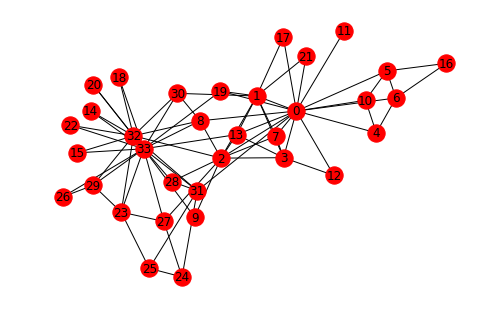

In [51]:
# Use example social network of karate club
KG = nx.karate_club_graph()
nx.draw(KG, with_labels=True)

### Drawing Graphs in Different Ways

There is lots of flexibility in drawing networks. You can find more [here in the `draw_networkx()` reference documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).

#### Drawing Algorithms

While it is great to create and have a network in a data structure, it is also important and interesting to explore these networks visually by plotting them in various ways.

| Method Command | Drawing Description |
|----------------|---------------------|
| `nx.draw(G)` | Draw graph with Matplotlib |
| `nx.draw_random(G)` | Draw graph with random layout |
| `nx.draw_circular(G)` | Draw graph with circular layout |
| `nx.draw_spectral(G)` | Draw graph with spectral layout, using eigenvectors of graph Laplacian |
| `nx.draw_shell(G)` | Draw graph with shell layout |

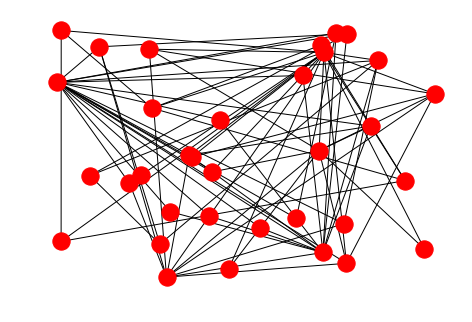

In [52]:
# Experiment with various drawing algorithms
nx.draw_random(KG)

You can also use these various drawing algorithms within the `nx.draw()` function.

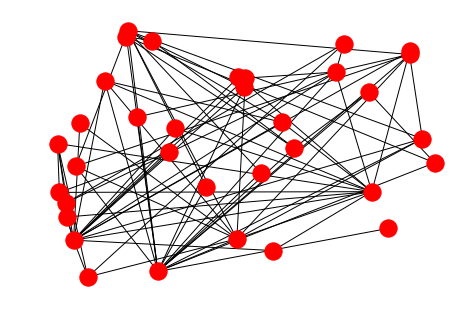

In [53]:
# Use the *._layout() functions within the draw() method
nx.draw(KG, pos=nx.random_layout(KG))

#### Drawing Nodes

There are a few parameters for the `nx.draw()` method that can manipulate node properties.

| Parameter | Description |
|-----------|-------------|
| `with_labels` | Set to `True` to draw labels on the nodes |
| `node_size` | Size of node with scalar of array |
| `node_color` | Node color with string or array of floats |
| `node_shape` | Shape of node from [`matplotlib.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html) markers |
| `pos` | Dictionary with node as keys and positions as values |
| `nodelist` | Draw only specified nodes |

See more [here](https://networkx.github.io/documentation/networkx-2.1/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).

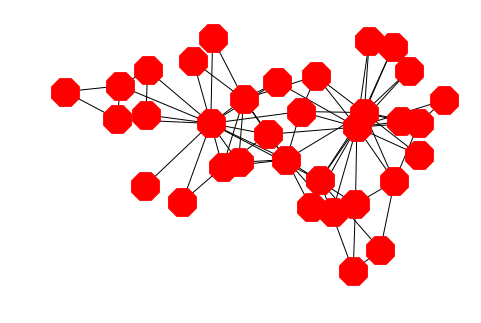

In [54]:
# Experiment with various node properties
nx.draw(KG, node_shape="8", node_size=900)

#### Drawing Edges

Here are some parameters specific for modifying how edges are displayed.

| Parameter | Description |
|-----------|-------------|
| `arrows` | For directed graphs, if `True` draw arrowhead |
| `arrowstyle` | For directed graphs, choose style of arrow |
| `arrowsize` | For directed graphs, choose size of arrow |
| `edgelist` | Draw only specified edges |
| `width` | Line width of edges |
| `edge_color` | Edge color with string or array with same number of edges |
| `edge_cmap` | Colormap for mapping intensities of edges |
| `style` | Edge line style |

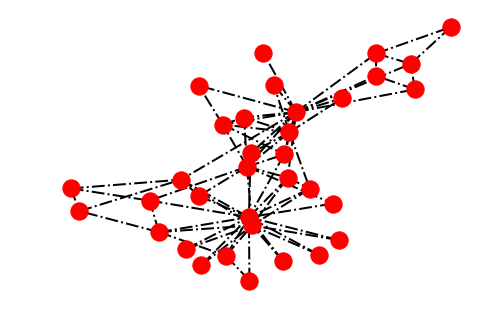

In [55]:
# Experiment with various edge properties
nx.draw(KG, style="dashdot", width=2)

#### Saving Figures

Because these figures so far are using Matplotlib, we can make use of that package's method to save figures.

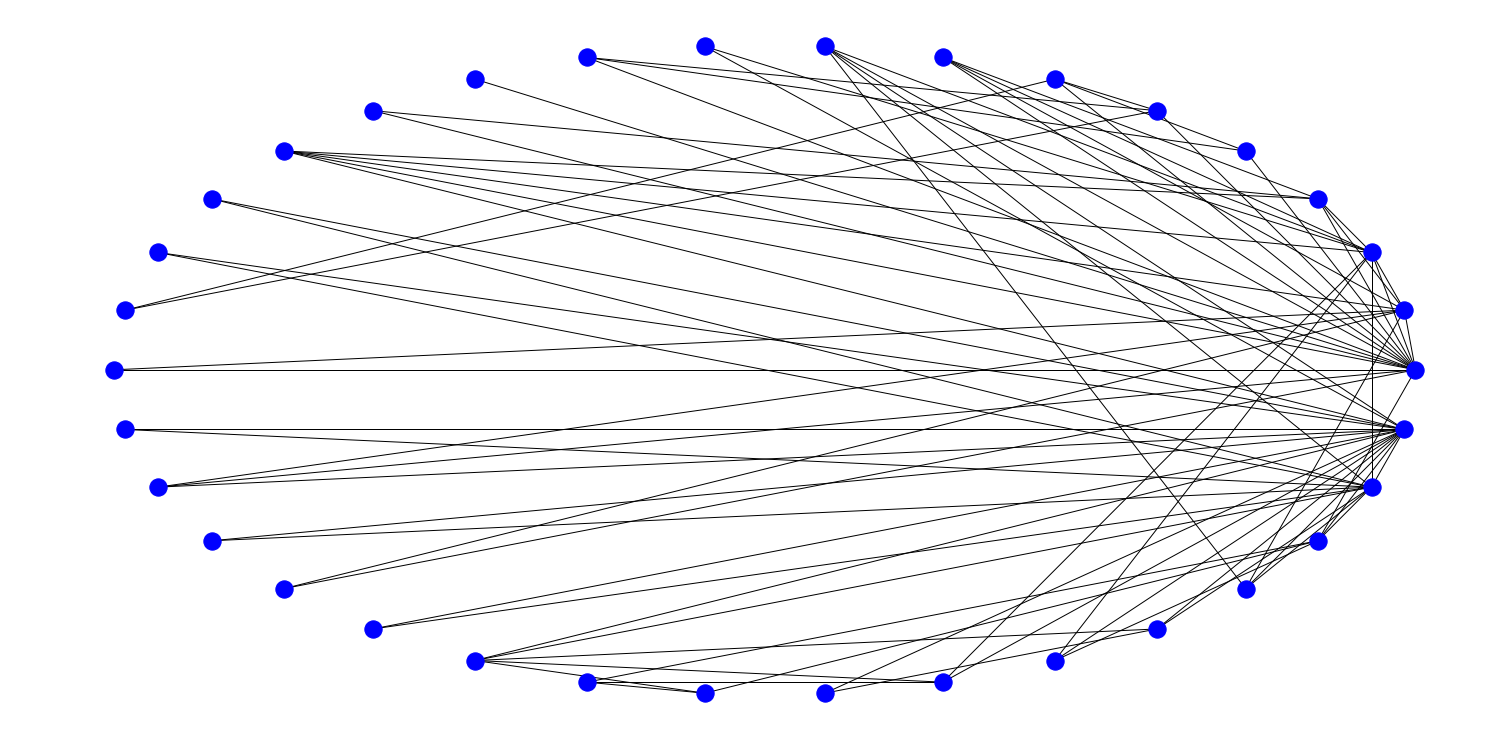

In [56]:
# Setup figure size
plt.figure(figsize=(20,10))

# Create plot
nx.draw_shell(KG, node_color="blue")

# Save plot out as image
plt.savefig("karate_graph_shell.png", format="PNG")

#### More

- [NetworkX Gallery Examples (NetworkX v1.9.1)](https://networkx.github.io/documentation/networkx-1.9.1/gallery.html)
- [Network drawing attributes and drawing features available](https://networkx.github.io/documentation/networkx-2.1/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

### Analyzing Graph Metrics

Now that we can visualize a graph, and add and remove from a graph, let's learn more about properties off the network as a whole.

#### Basic Descriptions of Nodes

Quick and basic metrics of a graph are the number of edges and nodes.

In [57]:
KG.number_of_nodes()

34

In [58]:
KG.number_of_edges()

78

#### Degree of Nodes

Remember, there are two basic kinds of graphs: directed and undirected. In the directed graph, there are two different kinds of edges: in and out.

In [59]:
# Find in-degree edges
DG.in_degree()

InDegreeView({'Michael': 0, 'Andy': 2, 'Angela': 1, 'Jim': 2, 'Kelly': 0})

In [60]:
# Find out-degree edges
DG.out_degree()

OutDegreeView({'Michael': 3, 'Andy': 1, 'Angela': 1, 'Jim': 0, 'Kelly': 0})

After knowing the number of edges/neighbors, you can also probe this further to find what/who specificially are around particular nodes.

In [61]:
# Look at node neighbors, returns iterator
[x for x in DG.neighbors("Michael")]

['Jim', 'Angela', 'Andy']

In [62]:
# Or through dictionary accessor
DG["Michael"]

AtlasView({'Jim': {'friend': True}, 'Angela': {}, 'Andy': {}})

#### Centrality as a Way for Node Importance

Here, we're going to try and identify the most important node or individual from the network based on their own connections and others.

In [63]:
# Calculate degree centrality
nx.degree_centrality(DG)

{'Andy': 0.75, 'Angela': 0.5, 'Jim': 0.5, 'Kelly': 0.0, 'Michael': 0.75}

In [64]:
# Try for karate club
nx.degree_centrality(KG)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

There are a few centrality calculations, which vary on what they emphasize in determining node significance.

Here are just a few.

| Algorithm | Description | Method Command |
|-----------|-------------|----------------|
| Degree centrality | Node is important based on degrees | `nx.degree_centrality(G)` |
| Eigenvector centrality | Node is important if linked by other important nodes | `nx.eigenvector_centrality(G)` |
| Betweenness centrality | Node is important if within shortest paths in nodes | `nx.betweenness_centrality(G)` |

In [65]:
# Calculate eigenvector centrality
nx.eigenvector_centrality(KG)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

### Basic Graph Algorithms

Describing properties of networks can only get you so far in understanding networks. More sophisticated methods have been developed to make use of the network structure itself for search and insight.

Two kinds of analysis we'll briefly cover are **graph traversal** and **community detection**.

#### Graph Traversal/Search

Given a network, **graph traversal** is the problem of searching through a network for particular nodes or certain paths. A path is a sequence of edges between two nodes.

**Problem**: Social networks like to recommend friends to you and one idea is to find friends close enough to your current social network. So who else would you potentially know?

In [66]:
# Check a path exists
nx.has_path(KG, 1, 20)

True

In [67]:
# Find shortest path
shortest_path = nx.shortest_path(KG, 1, 20)
shortest_path

[1, 2, 32, 20]

Now we have the shortest path, we can then plot this.

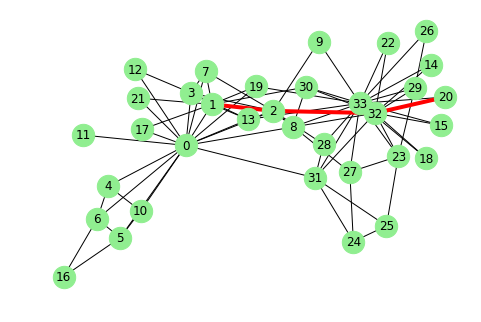

In [68]:
# Create pairwise edges that create path
edge_list = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]

# Keep nodes in same place when we plot, plotting all first, then color path
short_path_pos = nx.spring_layout(KG)

# Plot all nodes first, then highlight shortest path between 1 and 20
nx.draw(KG, short_path_pos, with_labels=True, node_color="lightgreen", node_size=500)
nx.draw_networkx_edges(KG, short_path_pos, edgelist=edge_list, width=4, edge_color="red")

#### Community Detection

In a social network, you may be interested in tightly connected groups of friends. We can use a method called **community detection** or **module detection** to answer this question.

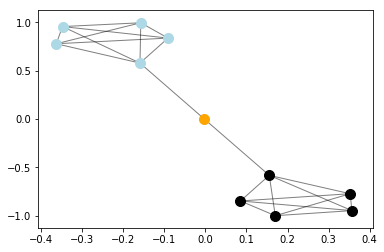

In [69]:
# Code inspired from
# https://perso.crans.org/aynaud/communities/api.html#community.best_partition
# https://networkx.github.io/documentation/stable/reference/algorithms/community.html

from networkx.algorithms import community

# Create network, calculate communities, and extract results
G = nx.barbell_graph(5, 1)
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

# Setup different colors for groups and set node position
colors = ["black", "orange", "lightblue"]
positions = nx.spring_layout(G)

# Loop through communities found and plot them
for idx, val in enumerate(communities):
    nx.draw_networkx_nodes(G, positions, communities[idx], node_size=100,
                           node_color=colors[idx])

nx.draw_networkx_edges(G, positions, alpha=0.5)
plt.show()

## Summary

- Graphs are collections of nodes and edges
- NetworkX gives a package to create, manipulate, and analyze graph objects
- There are multiple ways to draw/plot the same graph
- Properties of the graph allow you to analyze and make inferences on network
- Algorithms on graph explore more sophisticated properties of graphs

## Exercises

### Exercise 1 Explore Random Networks

Create a module that contains a function that creates a network of a certain size.

### Exercise 2 Explore Properties of Networks

Using your module from the previous exercise, create a function that takes in a graph object and calculates the number of neighbors of each node in a graph.

Return the results as a dictionary.

**Bonus Challenge**: Create a function and script to use the random network from the previous exercise, creates 10 networks of size 5, 10, 15 and use your just created function to return a dictionary with the average number of neighbors for each.

## Resources

- **Tools**
  - [NetworkX](https://networkx.github.io/)
    - [NetworkX Examples](https://networkx.github.io/documentation/stable/auto_examples/index.html): network software package in pure Python useful for smaller networks and dynamic networks
  - [igraph](http://igraph.org/): robust and stable network software package for R, Python, and C (with the C library underlying the other two implementations) to manipulate graph objects, analyze properties on graphs, and plot them
- **Network science**
  - [Network Science by Albert-László Barabási](http://networksciencebook.com/): full textbook on network science by leading network science expert Barabási
  - [Graphs and Networks - Mathigon](https://mathigon.org/course/graphs-and-networks/introduction): interactive textbook on graphs and networks covering network science
  - [Graphs and Networks - Plus Magazine](https://plus.maths.org/content/graphs-and-networks): approachable introduction of graphs and networks and their applications to social networks and in news stories